<a href="https://colab.research.google.com/github/bendrubin/git-test/blob/main/workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql
!sudo service postgresql start

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 13.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package logrotate.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../00-logrotate_3.19.0-1ubuntu1.1_amd64.deb ...
Unpacking logrotate (3.19.0-1ubuntu1.1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../01-netbase_6.3_all.deb ...
Unpacking netbase (6.3) ...
Selecting previously unselected package libcommon-sense-perl:amd64.
Preparing to unpack .../02-libcommon-sense-perl_3.75-2build1_amd64.deb ...
Unpacking libcommon-sense-perl:amd64 (3.75

In [14]:
!sudo -u postgres psql -c 'DROP DATABASE IF EXISTS moma;'

NOTICE:  database "moma" does not exist, skipping
DROP DATABASE


In [15]:
!sudo -u postgres psql -c 'CREATE DATABASE moma;'

CREATE DATABASE


In [16]:
!sudo -u postgres psql moma < momaviz.sql

SET
SET
SET
SET
SET
 set_config 
------------
 
(1 row)

SET
SET
SET
SET
SET
CREATE TABLE
ALTER TABLE
CREATE SEQUENCE
ALTER TABLE
ALTER SEQUENCE
CREATE TABLE
ALTER TABLE
CREATE SEQUENCE
ALTER TABLE
ALTER SEQUENCE
ALTER TABLE
ALTER TABLE
COPY 408
COPY 539
 setval 
--------
  15222
(1 row)

 setval 
--------
 138151
(1 row)

ALTER TABLE
ALTER TABLE


In [17]:
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"

ALTER ROLE


In [19]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = psycopg2.connect("dbname=moma user=postgres password=postgres host=localhost port=5432")
conn.set_session(autocommit=True)

cur = conn.cursor()


In [20]:
def sql_to_df(sql_query: str):
    """Get result set of sql_query as a pandas DataFrame."""
    return pd.read_sql(sql_query, conn)

In [25]:
# Task 1: Part 2 - Test your query

cur.execute(
    """
    SELECT department, COUNT(*)
    FROM moma_works
    GROUP BY department
    ORDER BY count DESC;
    """
)

works = cur.fetchall()
for w in works:
  print(w)

('Drawings & Prints', 294)
('Photography', 123)
('Architecture & Design', 78)
('Painting & Sculpture', 14)
('Fluxus Collection', 14)
('Media and Performance', 10)
('Film', 6)


<ipython-input-20-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


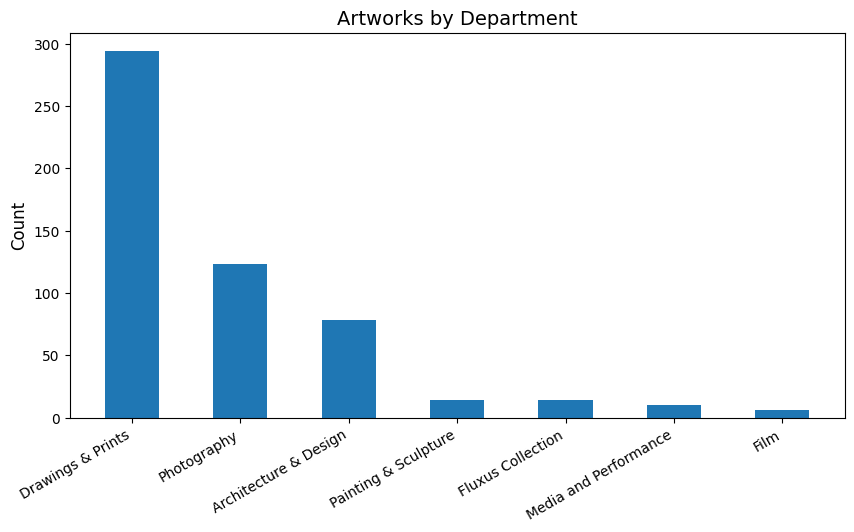

In [26]:
# Task 1: Part 2 - Data visualization

title = "Artworks by Department"
query = """
SELECT department, COUNT(*)
FROM moma_works
GROUP BY department
ORDER BY count DESC;
"""

dataframe = sql_to_df(query)
_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

# get evenly spaced x-axis positions
xpos = np.arange(len(dataframe))
# at each x, add bar (height based on count data)
axes.bar(xpos, dataframe["count"], width=0.50)
# at each x, add tick mark
axes.set_xticks(xpos)
# at each x, add label based on dept data
axes.set_xticklabels(dataframe["department"])
# label y-axis
axes.set_ylabel("Count", fontsize=12)
# rotate x-axis labels to prevent overlap
plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

In [28]:
cur.execute(
"""
SELECT classification, COUNT(*)
FROM moma_works
GROUP BY classification
ORDER BY count DESC
"""
)



In [ ]:
cur.execute(
"""
SELECT classification, COUNT(*)
FROM moma_works
GROUP BY classification
ORDER BY count DESC
"""
)

In [30]:
works = cur.fetchall()
for w in works:
  print(w)

('Photograph', 130)
('Print', 128)
('Illustrated Book', 108)
('Design', 47)
('Drawing', 45)
('Mies van der Rohe Archive', 14)
('Architecture', 13)
('Video', 9)
('Sculpture', 8)
('Painting', 8)
('Audio', 8)
('Film', 5)
('Frank Lloyd Wright Archive', 4)
('Periodical', 3)
('Multiple', 3)
('(not assigned)', 2)
('Ephemera', 2)
('Software', 1)
('Work on Paper', 1)


<ipython-input-20-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


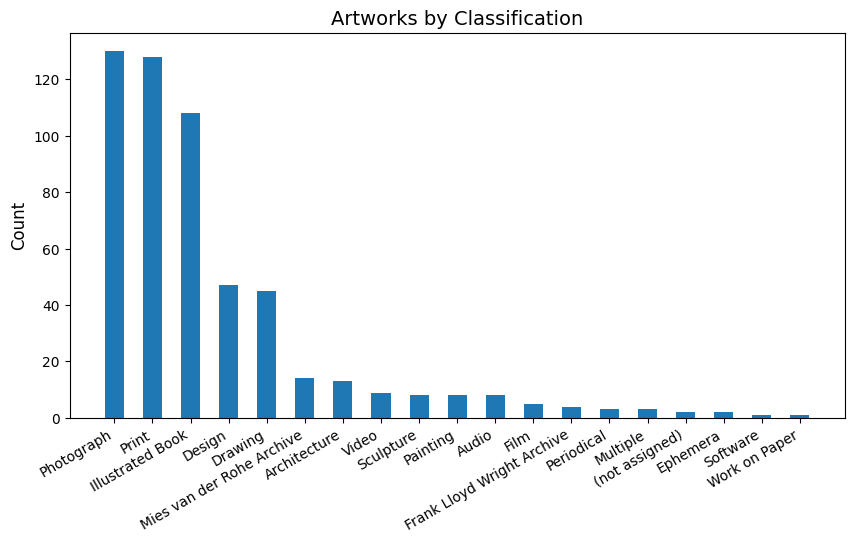

In [36]:

title = "Artworks by Classification"
query = """
SELECT classification, COUNT(*)
FROM moma_works
GROUP BY classification
ORDER BY count DESC
"""

dataframe = sql_to_df(query)
_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

xpos = np.arange(len(dataframe))
axes.bar(xpos, dataframe["count"], width=0.50)
axes.set_xticks(xpos)
axes.set_xticklabels(dataframe["classification"])
axes.set_ylabel("Count", fontsize=12)
plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

In [42]:
cur.execute(
"""
SELECT info ->> 'nationality' AS nationality, COUNT(*)
FROM moma_artists
WHERE info ->> 'nationality' IS NOT NULL
GROUP BY nationality ORDER BY count DESC LIMIT 10
"""
)

artists = cur.fetchall()
for a in artists:
  print(a)

('American', 175)
('French', 48)
('German', 31)
('British', 22)
('Russian', 15)
('Italian', 14)
('Japanese', 9)
('Mexican', 8)
('Dutch', 7)
('Spanish', 7)


<ipython-input-20-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


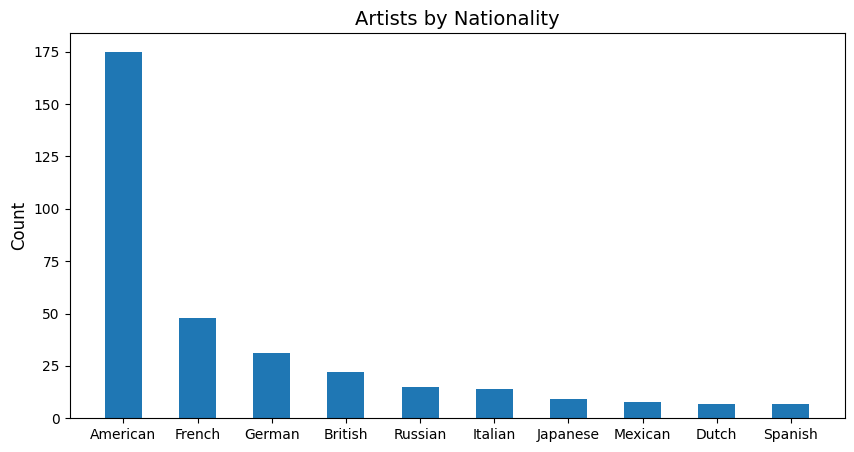

In [45]:
title = "Artists by Nationality"
query = """
SELECT info ->> 'nationality' AS nationality, COUNT(*)
FROM moma_artists
WHERE info ->> 'nationality' IS NOT NULL
GROUP BY nationality ORDER BY count DESC LIMIT 10
"""

dataframe = sql_to_df(query)
_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

xpos = np.arange(len(dataframe))
axes.bar(xpos, dataframe["count"], width=0.50)
axes.set_xticks(xpos)
axes.set_xticklabels(dataframe["nationality"])
axes.set_ylabel("Count", fontsize=12)

plt.show()

In [46]:
title = "Artists by gender"
query = """
SELECT info ->> 'gender' AS gender, COUNT(*)
FROM moma_artists
WHERE info ->> 'gender' IS NOT NULL
GROUP BY gender ORDER BY count DESC LIMIT 10
"""

<ipython-input-20-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


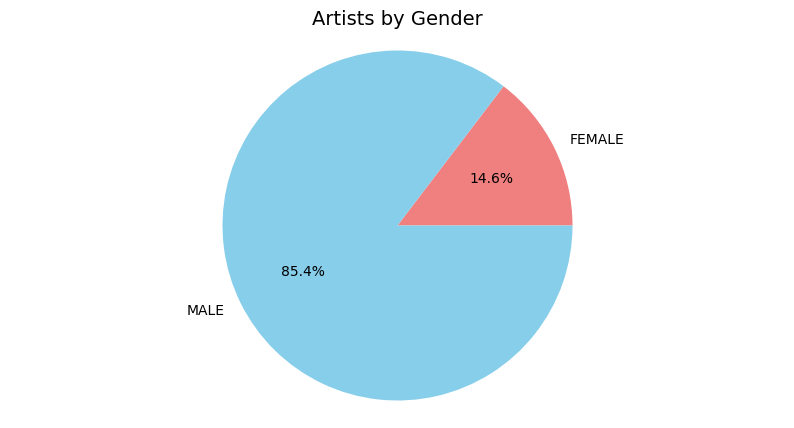

In [47]:
# Task 4: Part 3 - Data visualization

title = "Artists by Gender"
query = """
SELECT UPPER(info ->> 'gender') AS gender, COUNT(*)
FROM moma_artists
WHERE INFO ->> 'gender' IS NOT null
GROUP BY gender ORDER BY gender;
"""

dataframe = sql_to_df(query)
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

fig.set_facecolor('white')
axes.pie(
x=dataframe["count"],
labels=dataframe["gender"],
autopct='%1.1f%%',
colors=['lightcoral', 'skyblue', 'lavender']
)
# Equal aspect ratio ensures that pie is drawn as a circle.
axes.axis('equal')

plt.show()
